
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



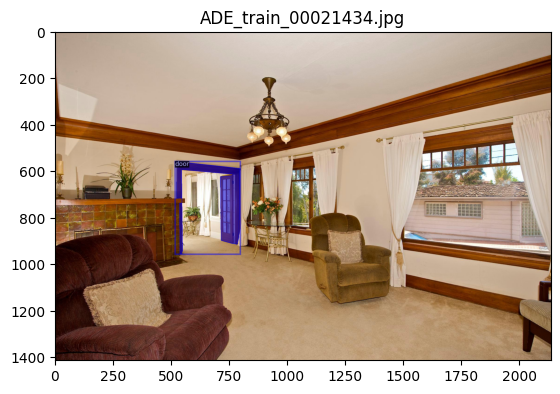

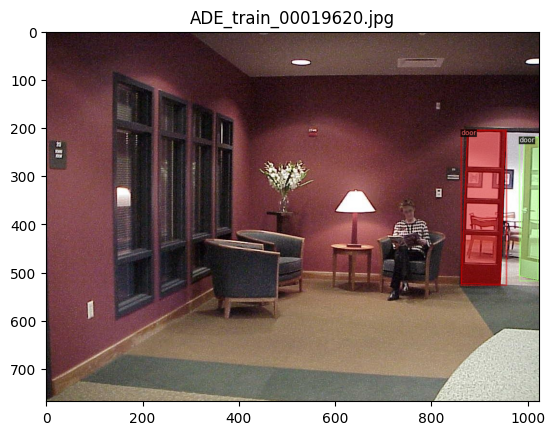

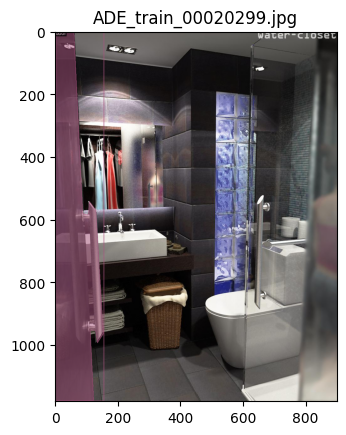

In [1]:
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2, random
from detectron2.utils.visualizer import Visualizer
import matplotlib.pyplot as plt
from detectron2.data.datasets import register_coco_instances
%matplotlib inline

datasetName = "ade20k2021_train"
datasetDir = "/home/tm/ADE20K_To_COCO/Dataset"
trainJsonFilePath = datasetDir + \
    "/ADE20K_2021_17_01/ade20k_instance_train.json"
register_coco_instances(datasetName, {}, trainJsonFilePath, datasetDir)
dataset = DatasetCatalog.get(datasetName)
for data in random.sample(dataset, 3):
    fileName = data["file_name"]
    img = cv2.imread(fileName)
    visualizer = Visualizer(img[:, :, ::-1],
                            metadata=MetadataCatalog.get(datasetName))
    out = visualizer.draw_dataset_dict(data)
    plt.title(fileName.split('/')[-1])
    plt.imshow(
        cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()